<a href="https://colab.research.google.com/github/lukeolson/imperial-multigrid/blob/master/lecture-3-amg-basics/17-smoothed-aggregation-1d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install pyamg if needed
!pip install pyamg

In [1]:
import numpy as np
import scipy.io as sio
import pyamg
import scipy.sparse.linalg as sla

import matplotlib.pyplot as plt
from matplotlib import collections
from matplotlib import tri
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Make a 1D Problem

In [2]:
A = pyamg.gallery.poisson((8,), format='csr')
x = np.linspace(0, 1, 10)[1:-1]

In [3]:
ml = pyamg.smoothed_aggregation_solver(
    A, max_coarse=1, keep=True, improve_candidates=None,
    presmoother=('block_gauss_seidel', {'sweep': 'forward'}),
    postsmoother=('block_gauss_seidel', {'sweep': 'forward'}),
    smooth=('jacobi', {'degree': 2}))

In [4]:
ml

multilevel_solver
Number of Levels:     3
Operator Complexity:  1.455
Grid Complexity:      1.500
Coarse Solver:        'pinv2'
  level   unknowns     nonzeros
    0            8           22 [68.75%]
    1            3            9 [28.12%]
    2            1            1 [ 3.12%]

# Aggregates

In [5]:
AggOp = ml.levels[0].AggOp.tocoo()

In [6]:
AggOp.todense()

matrix([[1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1]], dtype=int8)

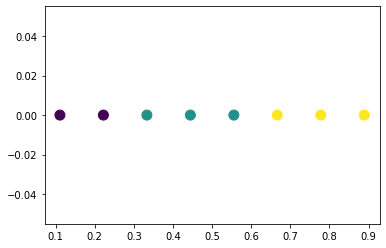

In [7]:
plt.scatter(x, 0*x, c=AggOp.col, s=100)

# Columns of $T$

In [8]:
T = ml.levels[0].T.todense()

In [9]:
T

matrix([[0.70710678, 0.        , 0.        ],
        [0.70710678, 0.        , 0.        ],
        [0.        , 0.57735027, 0.        ],
        [0.        , 0.57735027, 0.        ],
        [0.        , 0.57735027, 0.        ],
        [0.        , 0.        , 0.57735027],
        [0.        , 0.        , 0.57735027],
        [0.        , 0.        , 0.57735027]])

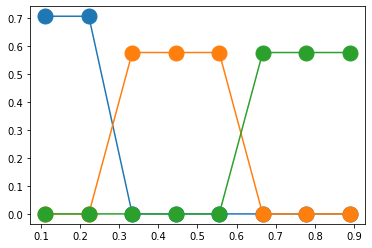

In [10]:
for i in range(3):
    plt.plot(x, T[:,i], '-o', ms=15, clip_on=False)

# PLot $P$

In [11]:
P = ml.levels[0].P.todense()

In [12]:
P

matrix([[0.30457461, 0.06820104, 0.        ],
        [0.38810349, 0.19226406, 0.        ],
        [0.23547442, 0.38508621, 0.        ],
        [0.08352888, 0.44094818, 0.06820104],
        [0.        , 0.38508621, 0.19226406],
        [0.        , 0.19226406, 0.38508621],
        [0.        , 0.06820104, 0.44094818],
        [0.        , 0.        , 0.31688517]])

In [13]:
T

matrix([[0.70710678, 0.        , 0.        ],
        [0.70710678, 0.        , 0.        ],
        [0.        , 0.57735027, 0.        ],
        [0.        , 0.57735027, 0.        ],
        [0.        , 0.57735027, 0.        ],
        [0.        , 0.        , 0.57735027],
        [0.        , 0.        , 0.57735027],
        [0.        , 0.        , 0.57735027]])

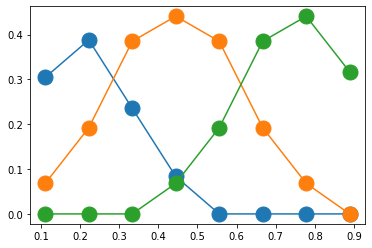

In [14]:
for i in range(3):
    plt.plot(x, P[:,i], '-o', ms=15, clip_on=False)